### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('sample_data/coupons.csv')

In [ ]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

2. Investigate the dataset for missing or problematic data.

In [ ]:
data = pd.read_csv('sample_data/coupons.csv')
# Loop over all columns and print names of those with one or more null/NaN values
for column in data.columns:
    if  data[column].isnull().sum() > 0:
      print('The "'+ column +'" column has null values in ',data[column].isnull().sum() , ' rows')

# Examine unique values in each column to look for problematic data
data.coupon.value_counts()

The "car" column has null values in  12576  rows
The "Bar" column has null values in  107  rows
The "CoffeeHouse" column has null values in  217  rows
The "CarryAway" column has null values in  151  rows
The "RestaurantLessThan20" column has null values in  130  rows
The "Restaurant20To50" column has null values in  189  rows


,count
coupon,
Coffee House,3996
Restaurant(<20),2786
Carry out & Take away,2393
Bar,2017
Restaurant(20-50),1492


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# For the "car" column, substitute a value of "sedan" for missing values
data['car'] = data['car'].fillna('sedan')

# For the other attributes  substitute a value of "never" for missing values
data['CoffeeHouse']         = data['CoffeeHouse'].fillna('never')
data['Bar']                 = data['Bar'].fillna('never')
data['CarryAway']           = data['CarryAway'].fillna('never')
data['RestaurantLessThan20'] = data['Restaurant20To50'].fillna('never')
data['Restaurant20To50']    = data['Restaurant20To50'].fillna('never')


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
# number of observations(rows) showing coupon was accepted
accepted_obscount = data[data['Y'] == 1].shape[0]

# total number observations(rows) in the population(entire dataframe)
total_obscount = data.shape[0]

# % of observations accepting the coupon
pct_accepted_obs = round(100.0*accepted_obscount/total_obscount,2)
print(pct_accepted_obs, '% of the total observations chose to accept the coupon')

56.84 % of the total observations chose to accept the coupont


5. Use a bar plot to visualize the `coupon` column.

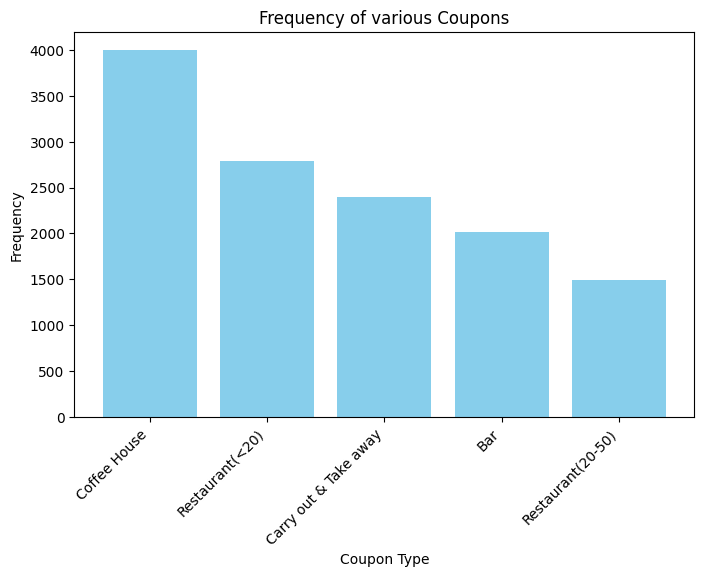

In [ ]:

# Obtain Number of Observations for each type of Coupon
df_for_barplot = data['coupon'].value_counts().reset_index().rename(columns={"index": "coupon", 0: "count"})

plt.figure(figsize=(8, 5))  # Set the figure size
plt.bar(df_for_barplot['coupon'], df_for_barplot['count'], color='skyblue')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.title('Frequency of various Coupons')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels, align right, and adjust font size

plt.show()



6. Use a histogram to visualize the temperature column.

<Axes: >

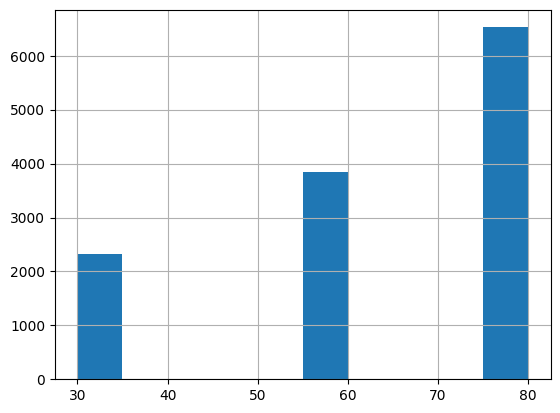

In [ ]:
data['temperature'].hist()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
df_bar_coupons = data[data['coupon']=='Bar']
df_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,less1,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,less1,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [ ]:
bar_coupons_accepted = df_bar_coupons[df_bar_coupons['Y'] == 1].shape[0]
bar_coupons_total = df_bar_coupons.shape[0]
pct_bar_coupons_accepted = round(100.0*bar_coupons_accepted/bar_coupons_total,2)
print(pct_bar_coupons_accepted, '% of the bar coupons were accepted')

41.0 % of the bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
#subset the observations based on 3 or less bar visits or more than 3 visits
df_barvisits_3_or_less = df_bar_coupons[df_bar_coupons['Bar'].isin(['never', 'less1','1~3'])]
df_barvisits_more_than_3 = df_bar_coupons[df_bar_coupons['Bar'].isin(['4~8','gt8'])]

# for each subset, tally the number of coupon acceptances
barvisits_3_or_less_accepted = df_barvisits_3_or_less[df_barvisits_3_or_less['Y'] == 1].shape[0]
barvisits_more_than_3_accepted = df_barvisits_more_than_3[df_barvisits_more_than_3['Y'] == 1].shape[0]

# for each subset, tally the total number of observations
barvisits_3_or_less_total = df_barvisits_3_or_less.shape[0]
barvisits_more_than_3_total = df_barvisits_more_than_3.shape[0]

# for each subset, compute coupon acceptance rate and compare
pct_bar_coupons_accepted_3_or_less_visits = round(100.0*barvisits_3_or_less_accepted/barvisits_3_or_less_total,2)
pct_bar_coupons_accepted_more_than_3_visits = round(100.0*barvisits_more_than_3_accepted/barvisits_more_than_3_total,2)

print("Acceptance Rate of Bar Coupons with 3 or less visits =  ",pct_bar_coupons_accepted_3_or_less_visits,"%")
print("Acceptance Rate of Bar Coupons with more than 3 visits =  ",pct_bar_coupons_accepted_more_than_3_visits,"%")

Acceptance Rate of Bar Coupons with 3 or less visits =   37.07 %
Acceptance Rate of Bar Coupons with more than 3 visits =   76.88 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
#df_bar_coupons['car'].value_counts()

#obtain the desired population
df_desired_population = df_bar_coupons[df_bar_coupons['age'] > '25']
df_desired_population = df_desired_population[~df_desired_population['Bar'].isin(['never','less1']) ]
df_desired_population = df_desired_population[~df_desired_population['car'].isin(['do not drive']) ]
#df_desired_population.info()

# also isolate the remaining population
df_remaining_population  = pd.merge(df_bar_coupons, df_desired_population, how='outer', indicator=True)
df_remaining_population = df_remaining_population[df_remaining_population['_merge'] == 'left_only'].drop(columns=['_merge'])
df_remaining_population.head()

# tally the number of coupons accepted
desired_acceptance_count = df_desired_population[df_desired_population['Y'] == 1].shape[0]
remaining_acceptance_count = df_remaining_population[df_remaining_population['Y'] == 1].shape[0]

# tally the total number of observations
desired_total = df_desired_population.shape[0]
remaining_total = df_remaining_population.shape[0]

# compute the coupon acceptance rate
pct_desired_accepted = round(100.0*desired_acceptance_count/desired_total,2)
pct_remaining_accepted = round(100.0*remaining_acceptance_count/remaining_total,2)

print("Acceptance Rate of  drivers who go to a bar more than once a month and are over the age of 25  =  ",pct_desired_accepted,"%")
print("Acceptance Rate of remaining population =  ",pct_remaining_accepted,"%")


Acceptance Rate of  drivers who go to a bar more than once a month and are over the age of 25  =   68.69 %
Acceptance Rate of remaining population =   33.54 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
#obtain the desired population
df_desired_population = df_bar_coupons[df_bar_coupons['passanger'] !='Kid(s)']
df_desired_population = df_desired_population[~df_desired_population['Bar'].isin(['never','less1']) ]
df_desired_population = df_desired_population[~df_desired_population['occupation'].isin(['Farming Fishing & Forestry']) ]
df_desired_population = df_desired_population[~df_desired_population['car'].isin(['do not drive']) ]

# also isolate the remaining population
df_remaining_population  = pd.merge(df_bar_coupons, df_desired_population, how='outer', indicator=True)
df_remaining_population = df_remaining_population[df_remaining_population['_merge'] == 'left_only'].drop(columns=['_merge'])
df_remaining_population.head()


# tally the number of coupons accepted
desired_acceptance_count = df_desired_population[df_desired_population['Y'] == 1].shape[0]
remaining_acceptance_count = df_remaining_population[df_remaining_population['Y'] == 1].shape[0]

# tally the total number of observations
desired_total = df_desired_population.shape[0]
remaining_total = df_remaining_population.shape[0]

# compute the coupon acceptance rate
pct_desired_accepted = round(100.0*desired_acceptance_count/desired_total,2)
pct_remaining_accepted = round(100.0*remaining_acceptance_count/remaining_total,2)

print("Acceptance Rate of drivers visit a bar more than once a month and had adult passengers in occupations other than Farming Fishing & Forestry  =  ",pct_desired_accepted,"%")
print("Acceptance Rate of remaining population =  ",pct_remaining_accepted,"%")


Acceptance Rate of drivers visit a bar more than once a month and had adult passengers in occupations other than Farming Fishing & Forestry  =   71.22 %
Acceptance Rate of remaining population =   29.7 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
#obtain the desired population
df_population0 = df_bar_coupons[~df_bar_coupons['car'].isin(['do not drive']) ]


df_population1 = df_population0[~df_population0['Bar'].isin(['never','less1']) ]
df_population1 = df_population1[df_bar_coupons['passanger'] !='Kid(s)']
df_population1 = df_population1[df_population1['maritalStatus'] !='widowed']


df_population2 =df_population0[~df_population0['Bar'].isin(['never','less1']) ]
df_population2 = df_population2[df_population2['age'] < '30']

df_population3 =df_population0[df_population0['income'].isin(['$25000 - $37499','$100000 or More','$12500 - $24999','$37500 - $49999'])]
df_population3 = df_population3[df_population3['RestaurantLessThan20'].isin(['4~8','gt8'])]


# tally the number of coupons accepted
population1_acceptance_count = df_population1[df_population1['Y'] == 1].shape[0]
population2_acceptance_count = df_population2[df_population2['Y'] == 1].shape[0]
population3_acceptance_count = df_population3[df_population3['Y'] == 1].shape[0]

# tally the total number of observations
population1_total = df_population1.shape[0]
population2_total = df_population2.shape[0]
population3_total = df_population3.shape[0]


# compute the coupon acceptance rate
pct_population1_accepted   = round(100.0*population1_acceptance_count/population1_total,2)
pct_population2_accepted   = round(100.0*population2_acceptance_count/population2_total,2)
pct_population3_accepted   = round(100.0*population3_acceptance_count/population3_total,2)


print("Acceptance Rate of drivers who visit a bar more than once a month and had adult passengers and were not widowed =  ",pct_population1_accepted,"%")
print("Acceptance Rate of drivers who visit a bar more than once a month and are under the age of 30 =  ",pct_population2_accepted,"%")
print("Acceptance Rate of drivers vist cheap restaurants more than 4 times a month with an income less than $50k =  ",pct_population3_accepted,"%")






Acceptance Rate of drivers who visit a bar more than once a month and had adult passengers and were not widowed =   71.22 %
Acceptance Rate of drivers who visit a bar more than once a month and are under the age of 30 =   72.97 %
Acceptance Rate of drivers vist cheap restaurants more than 4 times a month with an income less than $50k =   68.29 %


<ipython-input-111-a7c99372ab7b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_population1 = df_population1[df_bar_coupons['passanger'] !='Kid(s)']


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [113]:
print("Drivers who frequent bars quite often are more likely to accept bar coupons than those who dont. Additionally, this demographic consists of those who typically do not have young kids or are on a tight budget for food and drink. The Driver Age is not a factor. ")

Drivers who frequent bars quite often are more likely to accept bar coupons than those who dont. Additionally, this demographic consists of those who typically do not have young kids or are on a tight budget for food and drink. The Driver Age is not a factor. 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Most of the coupons offered are for Coffee houses. An analysis of the acceptance rate of Bar Coupons shows that these are mostly accepted by drivers without children in tow, who are steady patrons of bars or are on a tight budget for food and drink.